# Image Patches

In this module, we will explore the topology of different collections of image patches capturing line segments, which, as we will show using persistent homology and projective coordinates, concentrate on the projective plane $RP^2$.  Each image patch is a square $d \times d$ region of pixels.  Each pixel can be thought of as a dimension, so each patch lives in $\mathbb{R}^{d \times d}$, and a collection of patches can be thought of as a Euclidean point cloud in $\mathbb{R}^{d \times d}$

First, we perform all of the necessary library imports.  

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from ripser import ripser
from persim import plot_diagrams as plot_dgms
from dreimac import ProjectiveCoords, GeometryExamples, get_greedy_perm_pc, get_csm
import warnings
warnings.filterwarnings('ignore')

We now define a few functions which will help us to plot a collection of patches

In [2]:
def imscatter(X, P, dim, zoom=1):
    """
    Plot patches in specified locations in R2
    
    Parameters
    ----------
    X : ndarray (N, 2)
        The positions of each patch in R2
    P : ndarray (N, dim*dim)
        An array of all of the patches
    dim : int
        The dimension of each patch
    
    """
    #https://stackoverflow.com/questions/22566284/matplotlib-how-to-plot-images-instead-of-points
    ax = plt.gca()
    for i in range(P.shape[0]):
        patch = np.reshape(P[i, :], (dim, dim))
        x, y = X[i, :]
        im = OffsetImage(patch, zoom=zoom, cmap = 'gray')
        ab = AnnotationBbox(im, (x, y), xycoords='data', frameon=False)
        ax.add_artist(ab)
    ax.update_datalim(X)
    ax.autoscale()
    ax.set_xticks([])
    ax.set_yticks([])

def plot_patches(P, zoom = 1):
    """
    Plot patches in a best fitting rectangular grid
    """
    N = P.shape[0]
    d = int(np.sqrt(P.shape[1]))
    dgrid = int(np.ceil(np.sqrt(N)))
    ex = np.arange(dgrid)
    x, y = np.meshgrid(ex, ex)
    X = np.zeros((N, 2))
    X[:, 0] = x.flatten()[0:N]
    X[:, 1] = y.flatten()[0:N]
    imscatter(X, P, d, zoom)

## Oriented Line Segments

We now examine the collection of patches which hold oriented, slightly blurry line segments that are varying distances from the center of the patch.  First, let's start by setting up the patches.  Below, the "dim" variable sets the patch resolution, and the "sigma" variable sets the blurriness (a larger sigma means blurrier line segments). 

<IPython.core.display.Javascript object>


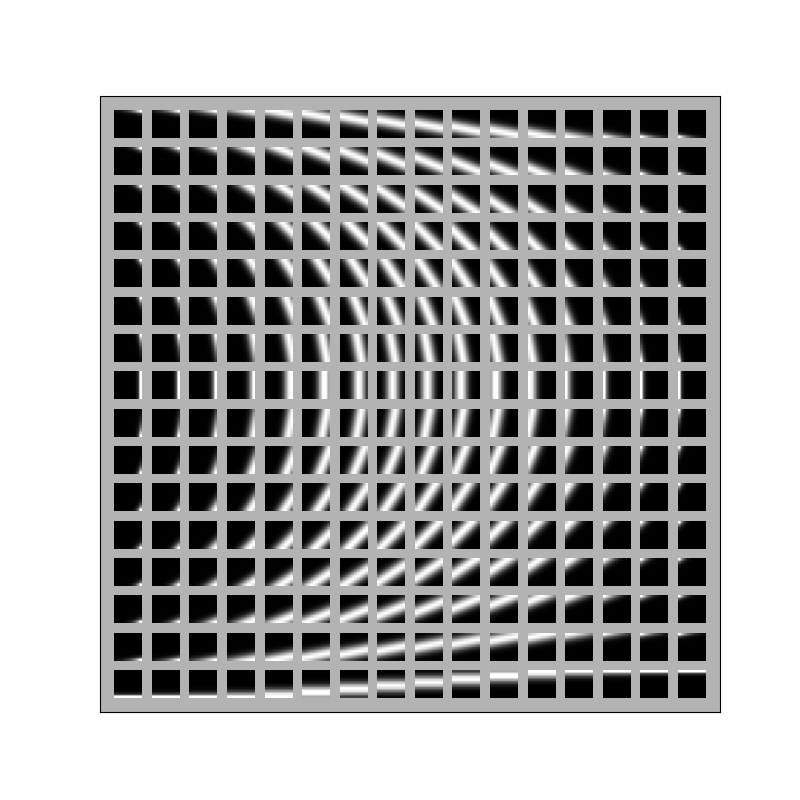

In [3]:
P = GeometryExamples.line_patches(dim=10, n_angles=16, n_offsets=16, sigma=0.25)
plt.figure(figsize=(8, 8))
plot_patches(P, zoom=2)
ax = plt.gca()
ax.set_facecolor((0.7, 0.7, 0.7))
plt.show()

Now let's compute persistence diagrams for this collection of patches.  This time, we will compute with both $\mathbb{Z}/2$ coefficients and $\mathbb{Z}/3$ coefficients up to H2.

<IPython.core.display.Javascript object>


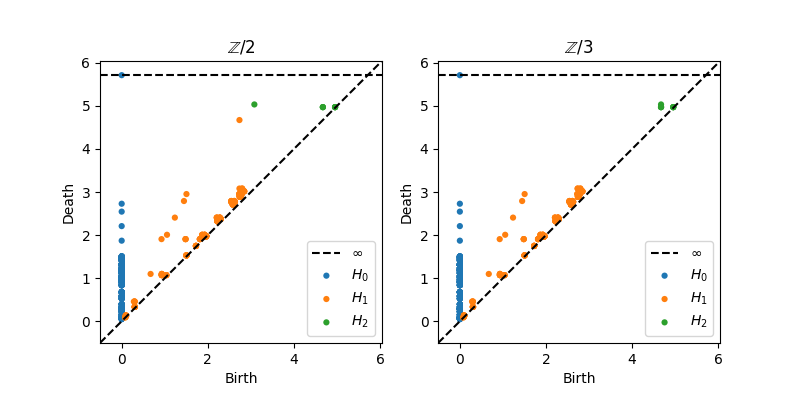

In [4]:
dgmsz2 = ripser(P, coeff=2, maxdim=2)['dgms']
dgmsz3 = ripser(P, coeff=3, maxdim=2)['dgms']
plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_dgms(dgmsz2)
plt.title("$\mathbb{Z}/2$")
plt.subplot(122)
plot_dgms(dgmsz3)
plt.title("$\mathbb{Z}/3$")
plt.show()

Notice how there is one higher persistence dot both for H1 and H2, which both go away when switching to $\mathbb{Z} / 3\mathbb{Z}$.  This is the signature of the projective plane!  To verify this, we will now look at these patches using "projective coordinates" (finding a map to $RP^2$).


Max persistence index 0, peristence 3.0647263526916504


<IPython.core.display.Javascript object>


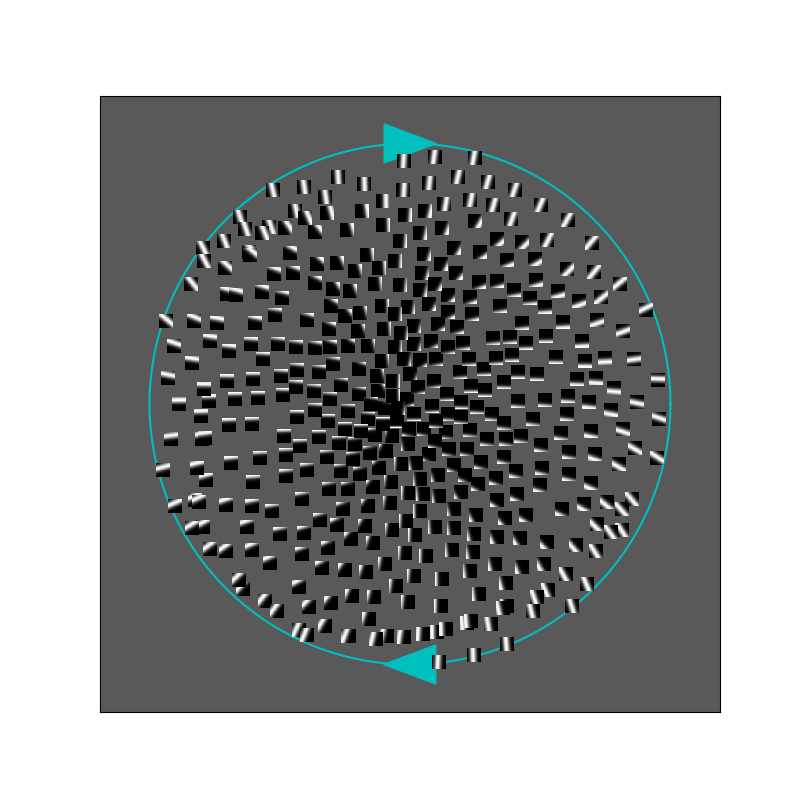

In [5]:
def plotProjBoundary():
    t = np.linspace(0, 2*np.pi, 200)
    plt.plot(np.cos(t), np.sin(t), 'c')
    plt.axis('equal')
    ax = plt.gca()
    ax.arrow(-0.1, 1, 0.001, 0, head_width = 0.15, head_length = 0.2, fc = 'c', ec = 'c', width = 0)
    ax.arrow(0.1, -1, -0.001, 0, head_width = 0.15, head_length = 0.2, fc = 'c', ec = 'c', width = 0)
    ax.set_facecolor((0.35, 0.35, 0.35))

P = GeometryExamples.line_patches(dim=10, n_angles=200, n_offsets=200, sigma=0.25)
proj = ProjectiveCoords(P, n_landmarks=200)
h1 = proj.dgms_[1]
# Find the index with greatest persistence in H1 and use
# the cocycle corresponding to that
idx = np.argmax(h1[:, 1]-h1[:, 0])
print("Max persistence index {}, peristence {}".format(idx, h1[idx, 1]-h1[idx, 0]))
res = proj.get_coordinates(proj_dim=2, perc=0.9, cocycle_idx=[idx])
X = res['X']
idx = get_greedy_perm_pc(X, 400)['perm']
SFinal = ProjectiveCoords.get_stereo_proj_codim1(X[idx, :])
P = P[idx, :]

plt.figure(figsize=(8, 8))
imscatter(SFinal, P, 10)
plotProjBoundary()
plt.show()